# 📌 Objective of the Notebook
### This notebook focuses on:
### - Building and evaluating a neural network for handwritten digit recognition (MNIST-style).
### - Normalizing image data.
### - Using `ParameterGrid` to test different hidden layer sizes and learning rates.
### - Selecting the best model and visualizing predictions.

# 📦 Import Required Libraries

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, ParameterGrid
import tensorflow as tf

# Set dark visualization theme
sns.set_style("dark")

# 📂 Load the Dataset

In [19]:
training_data = pd.read_csv('/kaggle/input/handwritten-digit-recognition/train.csv')
evaluation_data = pd.read_csv('/kaggle/input/handwritten-digit-recognition/test.csv')

# Display dimensions of datasets
print("Training Data Dimensions:", training_data.shape)   # Expected: (42000, 785)
print("Evaluation Data Dimensions:", evaluation_data.shape)  # Expected: (28000, 784)

Training Data Dimensions: (42000, 785)
Evaluation Data Dimensions: (28000, 784)


# 🧾 Prepare Features and Labels

In [20]:
# Extract label (first column) and pixel data (remaining columns) for training
target_values = training_data.iloc[:, 0].values
feature_matrix = training_data.iloc[:, 1:].values

# Extract features from evaluation (test) dataset
eval_features = evaluation_data.values

# 📊 Normalize Pixel Values to Range [0, 1]

In [21]:
feature_matrix = tf.keras.utils.normalize(feature_matrix, axis=1)
eval_features = tf.keras.utils.normalize(eval_features, axis=1)

# 🧠 Function to Build Neural Network

In [22]:
def build_network(hidden_layer_size=128, learning_rate_value=0.001):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=(784,)),  # 28x28 = 784 input pixels
        tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
        tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')  # 10 classes for digits 0-9
    ])
    
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate_value)
    
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# 🔍 Define Hyperparameter Grid

In [23]:
parameter_space = {
    'hidden_layer_size': [64, 128, 256],
    'learning_rate_value': [0.001, 0.01, 0.1]
}

# Generate combinations using ParameterGrid
param_combinations = list(ParameterGrid(parameter_space))

# 🧪 Train and Evaluate Models

In [24]:
top_score = 0
optimal_model = None
best_settings = None
training_record = None

for settings in param_combinations:
    print(f"Evaluating model with settings: {settings}")
    
    # Build model with current settings
    current_model = build_network(hidden_layer_size=settings['hidden_layer_size'],
                                  learning_rate_value=settings['learning_rate_value'])
    
    # Train model silently
    training_history = current_model.fit(feature_matrix, target_values, epochs=10, verbose=0)
    
    # Evaluate accuracy
    _, performance_score = current_model.evaluate(feature_matrix, target_values, verbose=0)
    print(f"Model Performance Score: {performance_score:.4f}")
    
    # Track the best model
    if performance_score > top_score:
        top_score = performance_score
        optimal_model = current_model
        best_settings = settings
        training_record = training_history

Evaluating model with settings: {'hidden_layer_size': 64, 'learning_rate_value': 0.001}
Model Performance Score: 0.9895
Evaluating model with settings: {'hidden_layer_size': 64, 'learning_rate_value': 0.01}
Model Performance Score: 0.9750
Evaluating model with settings: {'hidden_layer_size': 64, 'learning_rate_value': 0.1}
Model Performance Score: 0.7333
Evaluating model with settings: {'hidden_layer_size': 128, 'learning_rate_value': 0.001}
Model Performance Score: 0.9966
Evaluating model with settings: {'hidden_layer_size': 128, 'learning_rate_value': 0.01}
Model Performance Score: 0.9852
Evaluating model with settings: {'hidden_layer_size': 128, 'learning_rate_value': 0.1}
Model Performance Score: 0.7941
Evaluating model with settings: {'hidden_layer_size': 256, 'learning_rate_value': 0.001}
Model Performance Score: 0.9958
Evaluating model with settings: {'hidden_layer_size': 256, 'learning_rate_value': 0.01}
Model Performance Score: 0.9838
Evaluating model with settings: {'hidden_l

# 🧩 Confusion Matrix on Train Set (Visualization)

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


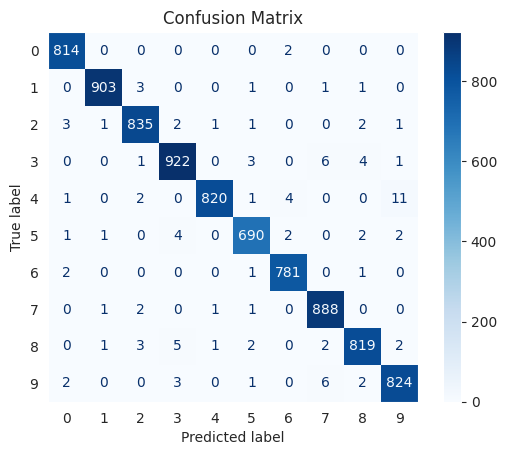

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(feature_matrix, target_values, test_size=0.2, random_state=42)

# Assuming 'optimal_model' is the best model from your previous loop
optimal_model.fit(X_train, y_train, epochs=10, verbose=0)  # Train on the training set

# Get predictions from the optimal model
y_pred_probs = optimal_model.predict(X_val)  # Probabilities from softmax
y_pred_classes = np.argmax(y_pred_probs, axis=1)  # Convert to class labels

# Compute the confusion matrix
cm = confusion_matrix(y_val, y_pred_classes)

# Get unique class labels
unique_labels = np.unique(y_val)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_labels)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# ✅ Display Best Model Configuration

In [8]:
print(f"\nOptimal Model Configuration: {best_settings}")
print(f"Optimal Model Performance Score: {top_score:.4f}")


Optimal Model Configuration: {'hidden_layer_size': 256, 'learning_rate_value': 0.001}
Optimal Model Performance Score: 0.9962


# 📉 Model Loss Curve (for Best Model)

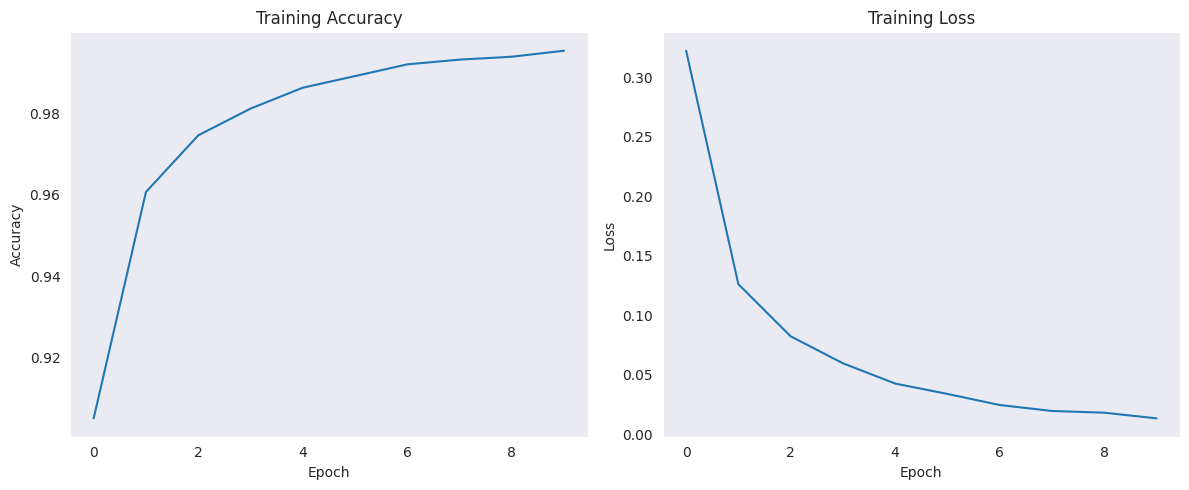

In [11]:
# Plot training accuracy and loss
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(training_record.history['accuracy'])
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# Loss
plt.subplot(1, 2, 2)
plt.plot(training_record.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()

# 🔮 Predict on Evaluation Set

In [9]:
forecasts = optimal_model.predict(eval_features)

875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


# 🖼️ Visualize a Grid of Predictions

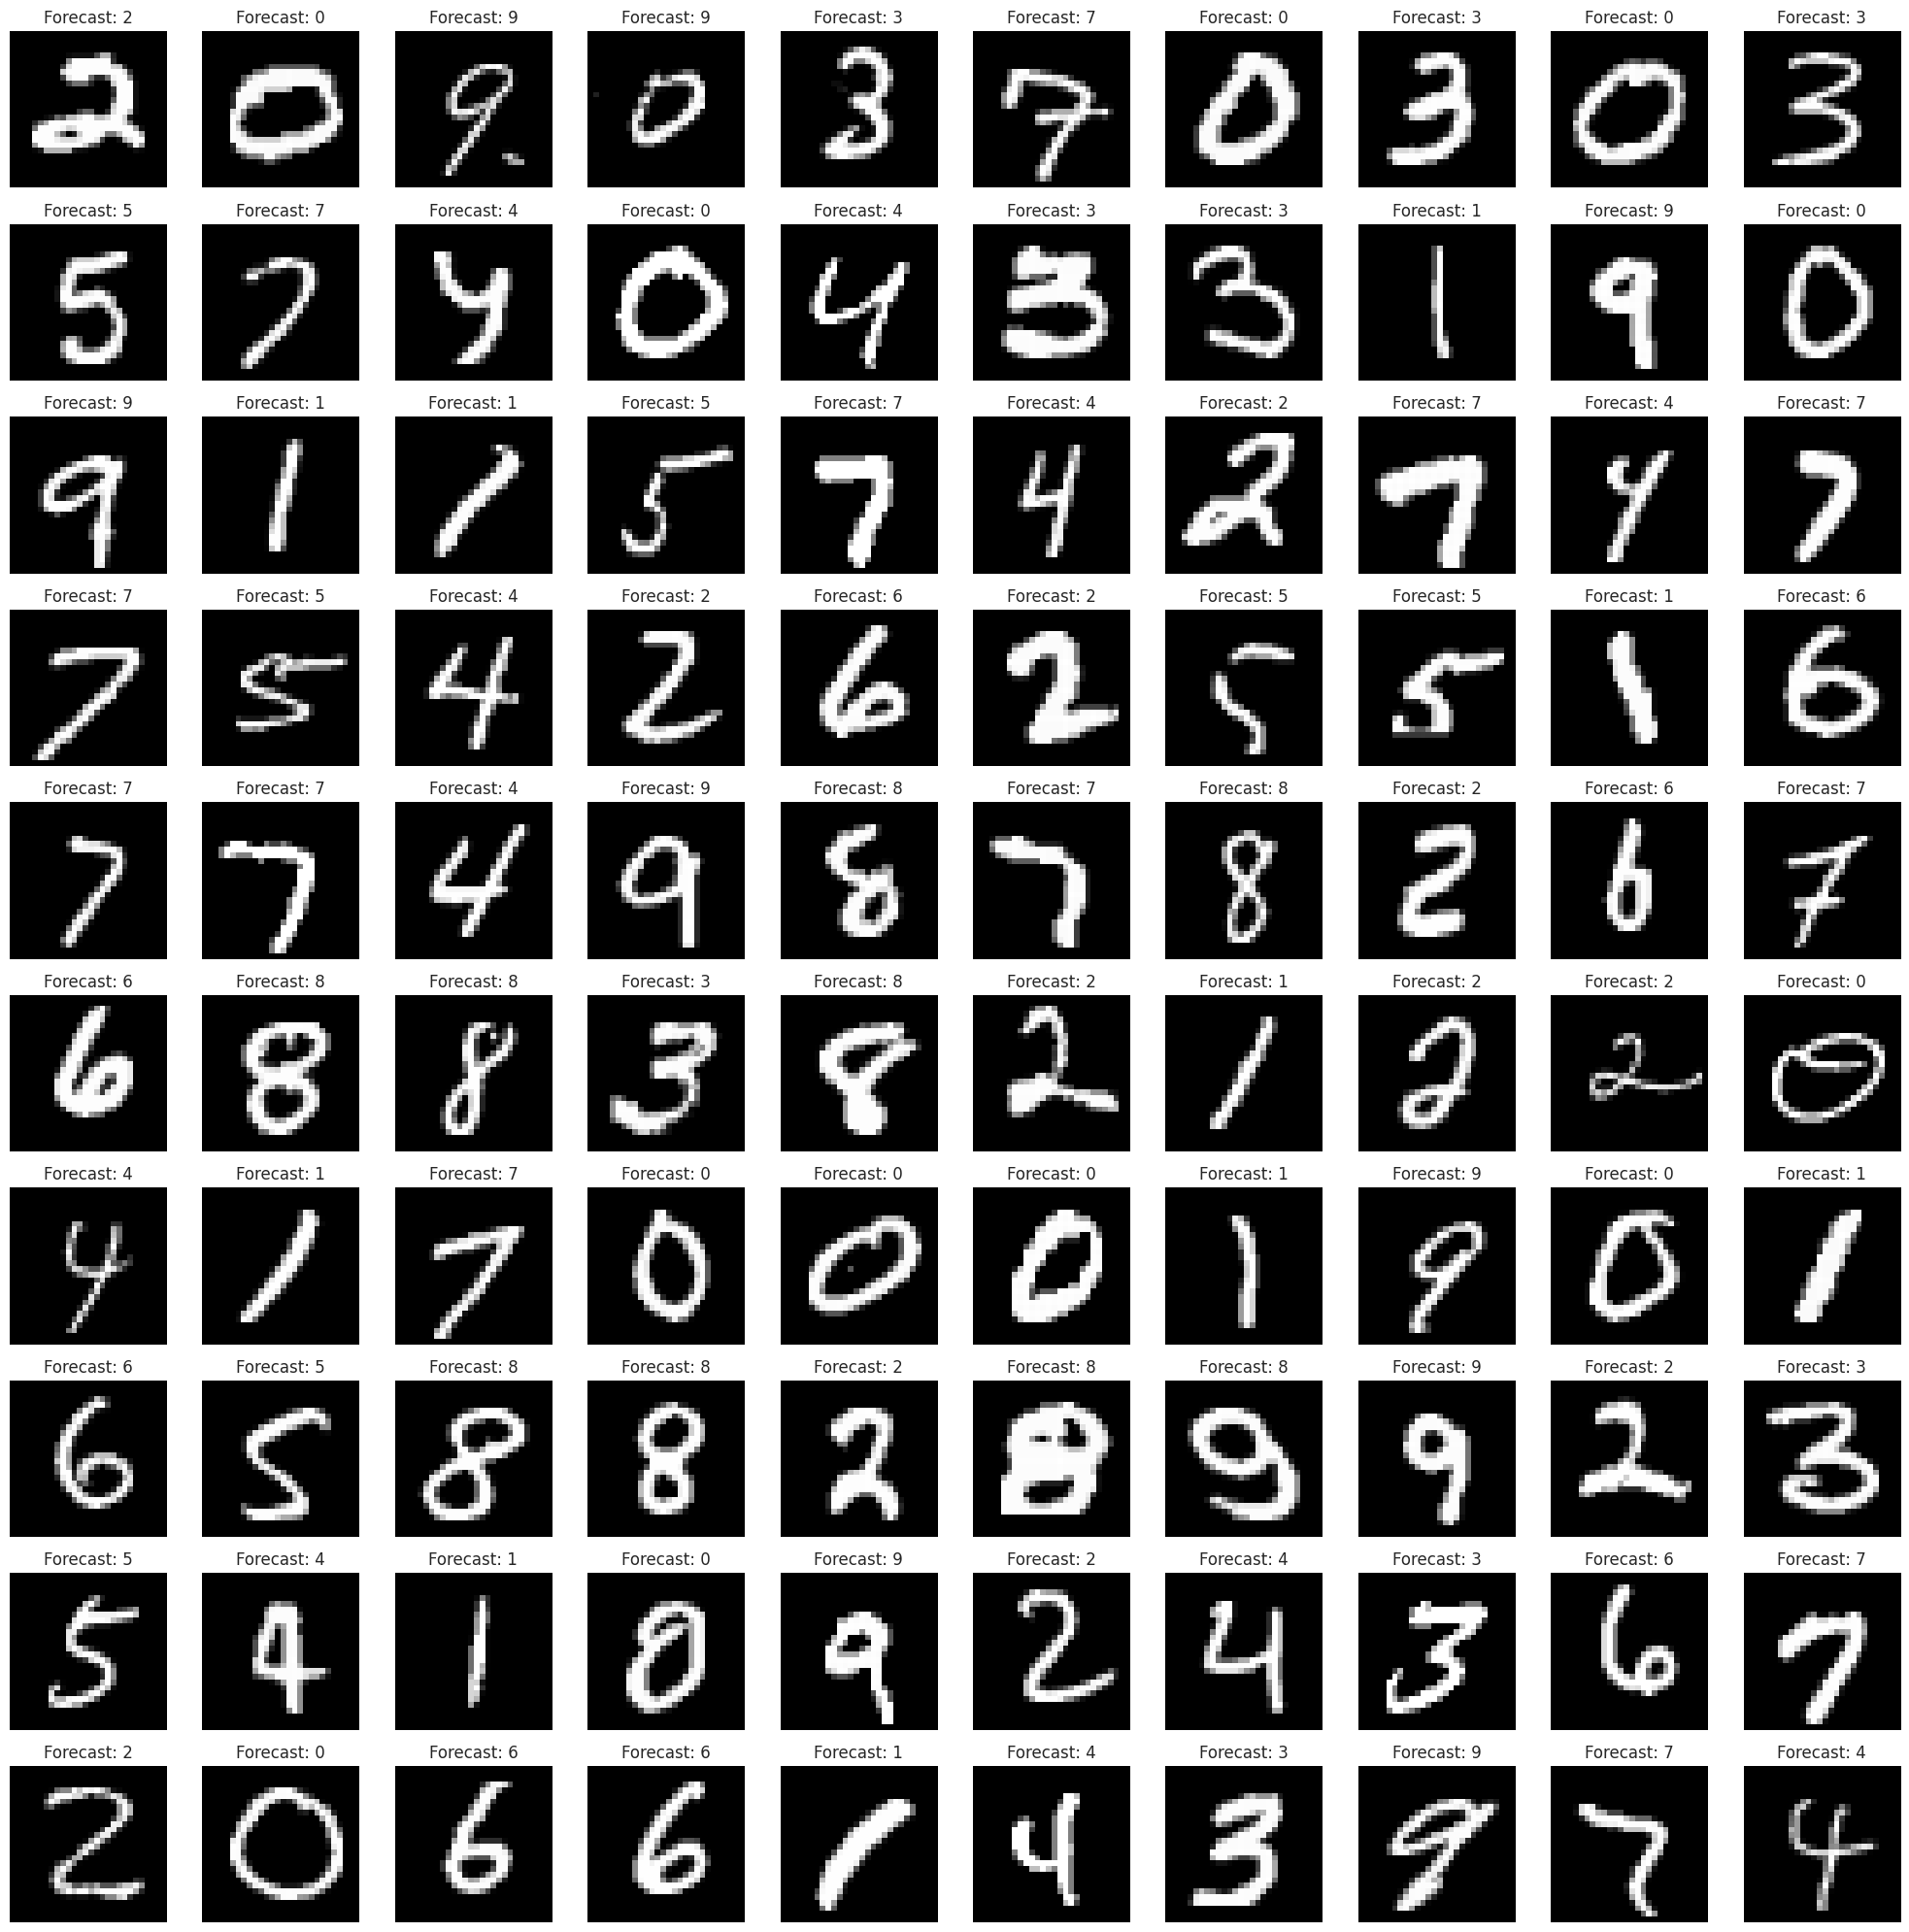

In [10]:
row_count = 10
col_count = 10
image_count = row_count * col_count

plt.figure(figsize=(2 * col_count, 2 * row_count))
for index in range(image_count):
    plt.subplot(row_count, col_count, index + 1)
    plt.imshow(eval_features[index].reshape(28, 28), cmap='gray')
    plt.title(f'Forecast: {np.argmax(forecasts[index])}')
    plt.axis('off')

plt.tight_layout()
plt.show()